<h1 style="font-size:2.1em;
           font-family: Calibri
           padding: 20px;
           margin: 20px;
           height: 100px;
           line-height: 100px;
           align-items: center;
           text-align: center;
           border: 3px solid #006400;
           background-color: #f1f1f1;
           "> Basic Model For AI Crowd Project</h1>


In [1]:
# Standard Python Packages
import pandas as pd
import numpy as np
import os
import seaborn as sns

from matplotlib import pyplot as plt
# Imports for Splitting
from sklearn.model_selection import train_test_split
# Imports for Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
# Imports for Evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
DataDir = r"\\WorkDocs\s.Khanbhai-staysurefiles\Shared With Me\Gibraltar\OTHER\AI Crowd Competition\Data"

In [3]:
Data = pd.read_csv(os.path.join(DataDir,'MiCorp_Training.csv'))
Data.head()

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,...,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,...,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0
1,PL042495,1.0,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,...,aparvvfowrjncdhp,10.0,Diesel,Tourism,174.0,11040.0,1143.0,1290.0,51.3,0.0
2,PL042496,1.0,0.196,Med1,2,1,Yearly,Yes,Retired,M,...,iwhqpdfuhrsxyqxe,8.0,Diesel,Commercial,150.0,14159.0,1193.0,1020.0,262.8,0.0
3,PL042498,1.0,0.000,Med1,2,2,Yearly,No,Retired,F,...,tdgkjlphosocwbgu,13.0,Gasoline,Tourism,200.0,19422.0,1315.0,30.0,70.3,0.0
4,PL042506,1.0,0.000,Max,4,2,Monthly,No,WorkPrivate,F,...,dpcnodgqfivkhxvn,28.0,Diesel,Tourism,173.0,13952.0,1112.0,1760.0,103.4,0.0


<h1 style="font-size:1.5em;
           font-family: Calibri
           padding: 20px;
           margin: 20px;
           height: 100px;
           line-height: 100px;
           align-items: center;
           text-align: center;
           border: 3px solid #006400;
           background-color: #f1f1f1;
           "> Predicting Claim Frequency</h1>

### Feature Creation

In [4]:
Numeric = Data.select_dtypes(exclude=['object'])
Numeric.dtypes

year                      float64
pol_no_claims_discount    float64
pol_duration                int64
pol_sit_duration            int64
drv_age1                  float64
drv_age_lic1              float64
drv_age2                  float64
drv_age_lic2              float64
vh_age                    float64
vh_speed                  float64
vh_value                  float64
vh_weight                 float64
population                float64
town_surface_area         float64
claim_amount              float64
dtype: object

In [5]:
Data['claim_occur'] = np.where(Data['claim_amount']>0,1,0)

In [6]:
[x for x in Data.columns if x != 'claim_amount' and x != 'claim_occur']

['id_policy',
 'year',
 'pol_no_claims_discount',
 'pol_coverage',
 'pol_duration',
 'pol_sit_duration',
 'pol_pay_freq',
 'pol_payd',
 'pol_usage',
 'drv_sex1',
 'drv_age1',
 'drv_age_lic1',
 'drv_drv2',
 'drv_sex2',
 'drv_age2',
 'drv_age_lic2',
 'vh_make_model',
 'vh_age',
 'vh_fuel',
 'vh_type',
 'vh_speed',
 'vh_value',
 'vh_weight',
 'population',
 'town_surface_area']

### Look At The Missing

In [7]:
Numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159444 entries, 0 to 159443
Data columns (total 15 columns):
year                      159444 non-null float64
pol_no_claims_discount    159444 non-null float64
pol_duration              159444 non-null int64
pol_sit_duration          159444 non-null int64
drv_age1                  159444 non-null float64
drv_age_lic1              159444 non-null float64
drv_age2                  52260 non-null float64
drv_age_lic2              52260 non-null float64
vh_age                    159440 non-null float64
vh_speed                  157564 non-null float64
vh_value                  157564 non-null float64
vh_weight                 157564 non-null float64
population                159444 non-null float64
town_surface_area         159444 non-null float64
claim_amount              159444 non-null float64
dtypes: float64(13), int64(2)
memory usage: 18.2 MB


In [8]:
X = Numeric[[x for x in Numeric.columns 
                                        # Remove Dependent variables
                                         if x != 'claim_amount' 
                                         and x != 'claim_occur'
                                        # Remove Where many missings
                                         and x != 'drv_age2'
                                         and x != 'drv_age_lic2'
                                                              ]]

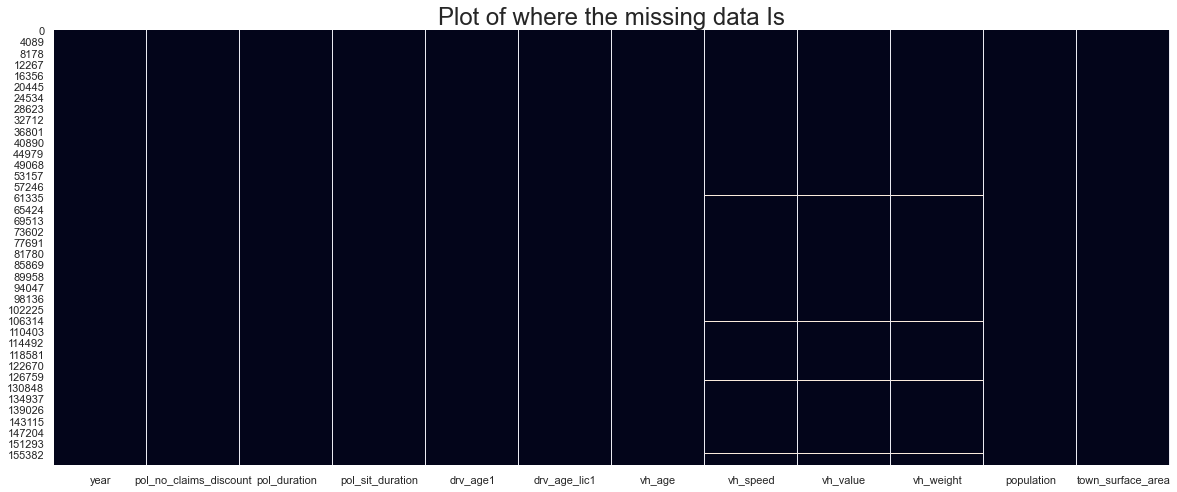

In [9]:
sns.set(rc={'figure.figsize':(20,8)})
sns.heatmap(X.isnull(), cbar=False).set_title('Plot of where the missing data Is', fontsize="24");

### Train-test Split

In [10]:
# Fill missings with the mean
X['vh_speed'].fillna((X['vh_speed'].mean()),inplace=True)
X['vh_value'].fillna((X['vh_value'].mean()),inplace=True)
X['vh_weight'].fillna((X['vh_weight'].mean()),inplace=True)
X['vh_age'].fillna((X['vh_age'].mean()),inplace=True)
y = Data[['claim_occur']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

C:\Users\s.khanbhai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
X.isna().sum()

year                      0
pol_no_claims_discount    0
pol_duration              0
pol_sit_duration          0
drv_age1                  0
drv_age_lic1              0
vh_age                    0
vh_speed                  0
vh_value                  0
vh_weight                 0
population                0
town_surface_area         0
dtype: int64

In [12]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

C:\Users\s.khanbhai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [13]:
print(f"Accuracy Training {knn.score(X_train, y_train)}")
print(f"Accuracy Test {knn.score(X_test, y_test)}")

Accuracy Training 1.0
Accuracy Test 0.8257097462056278


In [14]:
y_test_arr = np.array([x[0] for x in y_test.values])
accuracy = sum(preds == y_test_arr) / len(y_test_arr)
print(f"Accuracy (manually calculated) on the Test Set: {accuracy*100:.1f}%")

Accuracy (manually calculated) on the Test Set: 82.6%


In [15]:
LogisticReg = LogisticRegression()
LogisticReg.fit(X_train, y_train)
pred = LogisticReg.predict(X_test)
predProbs = LogisticReg.predict_proba(X_test)[:,1]
predProbs

C:\Users\s.khanbhai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\s.khanbhai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0.093965  , 0.09475715, 0.10064556, ..., 0.15933971, 0.04566567,
       0.12022736])

In [16]:
y_test_arr = np.array([x[0] for x in y_test.values])
accuracy = sum(predProbs == y_test_arr) / len(y_test_arr)
print(f"Accuracy (manually calculated) of Log Reg on the Test Set: {accuracy*100:.1f}%")

Accuracy (manually calculated) of Log Reg on the Test Set: 0.0%


In [20]:
data = pd.concat([pd.Series(y_test_arr),pd.Series(predProbs)], axis=1, keys=['Actuals Test', 'Predicted Test'])
data['Actuals Test'] = data['Actuals Test'].astype('str')
data.head()

,Actuals Test,Predicted Test
0,0,0.093965
1,0,0.094757
2,0,0.100646
3,0,0.124088
4,0,0.104325


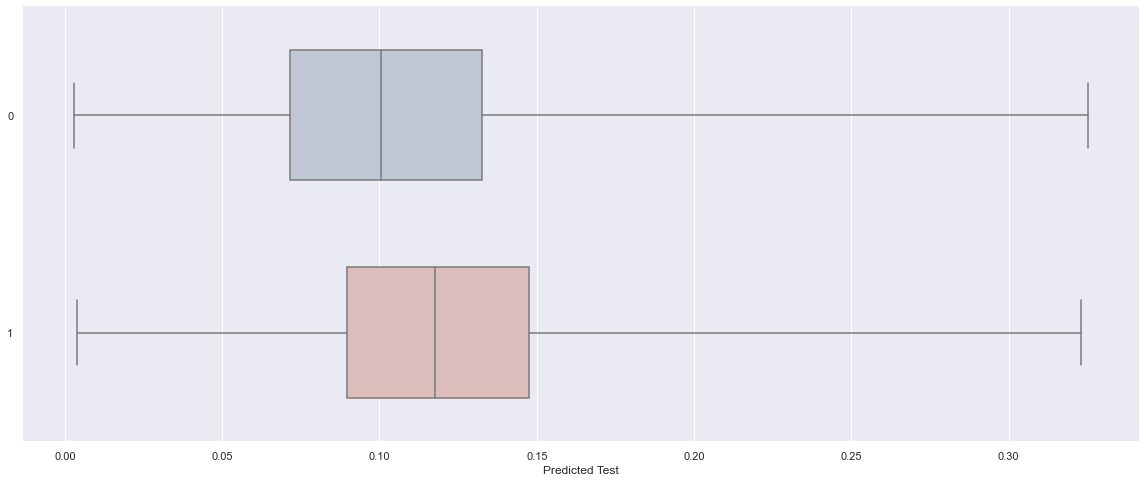

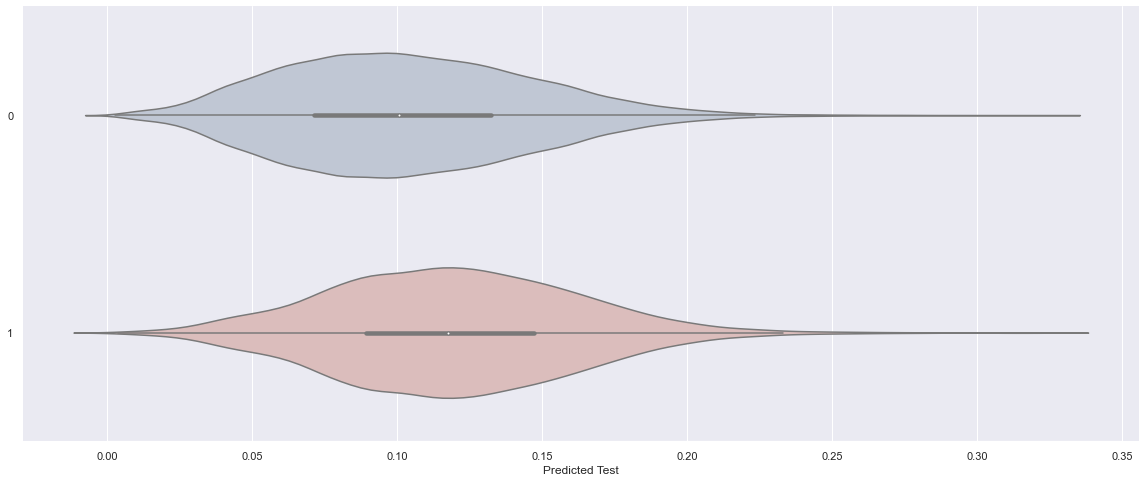

In [27]:
f, ax = plt.subplots(figsize=(20,8))

#data = pd.concat([pd.Series(y_test_arr),pd.Series(predProbs)], axis=1, keys=['Actuals Test', 'Predicted Test'])

#Create the BoxPlot
sns.boxplot(x='Predicted Test' , y='Actuals Test', data=data,
           whis=[0,100], width=0.6, palette="vlag")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

f, ax = plt.subplots(figsize=(20,8))

#data = pd.concat([pd.Series(y_test_arr),pd.Series(predProbs)], axis=1, keys=['Actuals Test', 'Predicted Test'])

#Create the BoxPlot
sns.violinplot(x='Predicted Test' , y='Actuals Test', data=data,
           whis=[0,100], width=0.6, palette="vlag")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

<h1 style="font-size:1.5em;
           font-family: Calibri
           padding: 20px;
           margin: 20px;
           height: 100px;
           line-height: 100px;
           align-items: center;
           text-align: center;
           border: 3px solid #006400;
           background-color: #f1f1f1;
           "> Predicting Claim Severity</h1>

In [ ]:
Data.columns

In [ ]:
Claims = Data[Data['claim_occur'] == 1]
Claims.head()

In [ ]:
median = np.median(Claims.claim_amount)
print("Median: {:.2f}".format(median))
Claims.claim_amount.describe()

In [ ]:
sns.distplot(Claims.claim_amount);

### Results from using Median Claim Amount

In [ ]:
rmse = mean_squared_error(
    Claims.claim_amount, 
    [median for x in range(0,len(Claims))])**0.5
print(f"RMSE here is: {rmse:.2f}")

In [ ]:
r2 = r2_score(Claims.claim_amount,[median for x in range(0,len(Claims))])
print(f"R2 here is: {r2:.2f}")

In [ ]:
Claims.dtypes

In [ ]:
corrmat = Claims.iloc[:,:-1].corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [ ]:
Claims_ExcLarge = Claims[Claims['claim_amount']<20000]
vars = ['vh_age', 'pol_no_claims_discount','town_surface_area']
for var in vars:
    df = pd.concat([Claims_ExcLarge['claim_amount'], Claims_ExcLarge[var]], axis=1)
    df.plot.scatter(x=var, y='claim_amount')

In [ ]:
cols = ['claim_amount','vh_age', 'pol_no_claims_discount','town_surface_area']
sns.pairplot(Claims_ExcLarge[cols], size=4)

### Missing Data

In [ ]:
total = Claims_ExcLarge.isnull().sum().sort_values(ascending=False)
total = total.apply(lambda x:"{:,}".format(x))
percent = (Claims_ExcLarge.isnull().sum()/Claims_ExcLarge.isnull().count()).sort_values(ascending=False) 
percent = percent.apply(lambda x:"{:.1f}%".format(x*100))
missing_data = pd.concat([total,percent], axis=1, keys=['Total Missing','Percent'])
missing_data.head(10)

In [ ]:
X = Claims[['vh_age', 'pol_no_claims_discount','town_surface_area']]
y = Claims[['claim_amount']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
lr.coef_

### Results from using Regression

In [ ]:
rmse = mean_squared_error(
    y_test, 
    y_pred)**0.5
print(f"RMSE here is: {rmse:.2f}")

In [ ]:
r2 = r2_score(y_test,y_pred)
print(f"R2 here is: {r2:.2f}")

In [ ]:
y_pred[:4]

In [ ]:
y_test[:4]

In [ ]:
rmse = mean_squared_error(y_train, lr.predict(X_train))**0.5
print(f"RMSE here is: {rmse:.2f}")

In [ ]:
r2 = r2_score(y_train,lr.predict(X_train))
print(f"R2 here is: {r2:.2f}")

### Showing The Results Graphically

In [ ]:
print(y_test.dtypes)

In [ ]:
plt.figure(figsize=(10,10))
y_test_out = [float(y[0]) for y in y_test.values]
y_pred_out = [float(y[0]) for y in y_pred]
plt.scatter(y_test_out, y_pred_out, color='#DC143C')

p1 = max(max(y_test_out),max(y_pred_out))
p2 = min(min(y_test_out),min(y_pred_out))
plt.plot([p1,p2],[p1,p2], 'b-')

plt.xlabel('Actual Claim Values', fontsize=15)
plt.ylabel('Predicted Claim Values', fontsize=15)
plt.axis('equal')

# Limit max value shown in chart to 20,000
ax = plt.gca()
ax.set_xlim([0,7500])
ax.set_ylim([0,7500])

plt.show()

<h1 style="font-size:1.5em;
           font-family: Calibri
           padding: 20px;
           margin: 20px;
           height: 100px;
           line-height: 100px;
           align-items: center;
           text-align: center;
           border: 3px solid #006400;
           background-color: #f1f1f1;
           "> Predicted Frequency x Severity</h1>